# Climate Data Analysis

Various climate variables and factors will be collected, processed, and interpreted in this climate data analysis project. This project aims for exploratory data analysis (EDA) of climate data, focusing on visualizing trends and relationships between climate variables, such as sea surface temperature, wind speed, and geographical area. A climate adaptation and management plan should generate useful statistics for decision-making.

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load climate data from a CSV file
data = pd.read_csv('Marine_CSV_sample.csv')

#Data cleaning and preprocessing
#Remove rows with missing values
data.dropna(inplace = True)

#Convert Time of Observation to a datetime format
data['Time of Observation'] = pd.to_datetime(data['Time of Observation']) #This conversion is essential for time-based analysis.

#Select specific columns for analysis
selected_columns = ['Latitude', 'Longitude', 'Ice Accretion On Ship', 'Sea Level Pressure', 'Air Temperature', 'Sea Surface Temperature', 'Wave Height', 'Total Cloud Amount', 'Visibility', 'Wind Direction', 'Wind Speed', 'Time of Observation']

#Extract the selected columns from the data
selected_data = data[selected_columns]

#Statistical analysis
#Calculate mean, median, and standard deviation for each selected column
statistics = selected_data.describe()

In [14]:
#Displays information, structure, and characteristics about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Identification                        55 non-null     object        
 1   Latitude                              55 non-null     float64       
 2   Longitude                             55 non-null     float64       
 3   Time of Observation                   55 non-null     datetime64[ns]
 4   Ice Accretion On Ship                 55 non-null     object        
 5   Thickness of Ice Accretion On Ship    55 non-null     object        
 6   Rate of Ice Accretion on Ship         55 non-null     object        
 7   Sea Level Pressure                    55 non-null     object        
 8   Characteristics of Pressure Tendency  55 non-null     object        
 9   Pressure Tendency                     55 non-null     object        
 10  Air 

Observations:
1. There are 55 entries and 33 columns
2. The "Identification," "Latitude," "Longitude," and "Time of Observation" columns have 55 non-null entries and are of type object, float64, and datetime64
3. Memory usage for this DataFrame is approximately 14.3 KB

In [16]:
#Printing the summary statistics for the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,55.0,-20.558182,13.168181,-35.9,-32.3,-23.9,-11.20,6.1
Longitude,55.0,51.829091,27.141806,2.9,29.0,51.2,75.95,94.6
Visibility,55.0,97.527273,0.503857,97.0,97.0,98.0,98.00,98.0
Wind Direction,55.0,161.127273,99.436757,20.0,90.0,140.0,215.00,362.0
Wind Speed,55.0,108.345455,69.483336,10.0,69.5,108.0,139.00,463.0


Observations:
1. For "Latitude," "Longitude," "Visibility," "Wind Direction," and "Wind Speed," there are 55 non-null entries.
2. The average latitude is around -20.56, with a standard deviation of approximately 13.17, indicating variability.
3. The southernmost point recorded is -35.9, while the northernmost is 6.1. In terms of longitude, the average is about 51.83, with a standard deviation of 27.14.
4. The dataset covers from the westernmost point at 2.9 to the easternmost at 94.6.
5. Visibility shows little variation with an average of 97.53.
6. Wind direction exhibits a broader range, with an average of 161.13 and notable standard deviation of 99.44.
7. Wind speed, with an average of 108.35 and a standard deviation of 69.48, reflects variability.

# Data Visualization

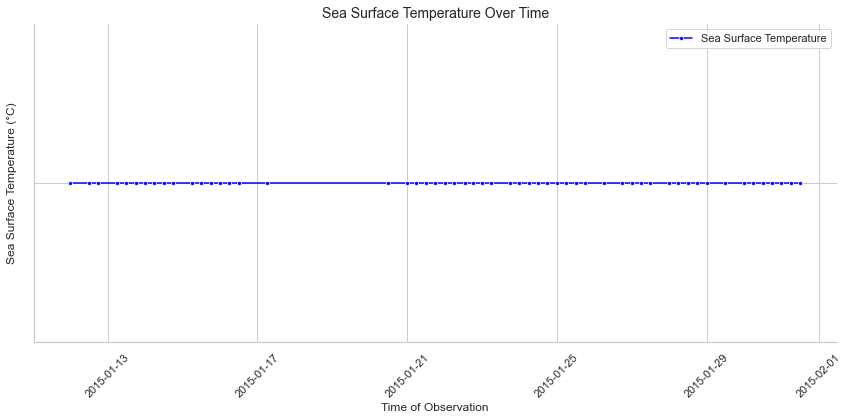

In [6]:
#Time Series Analysis to Identify Trends
#Set the style and context of the plot
sns.set_style("whitegrid")
sns.set_context("notebook")

#Create a line plot with seaborn
plt.figure(figsize = (12, 6))#12 units in width and 6 units in height
sns.lineplot(x = selected_data['Time of Observation'], y = selected_data['Sea Surface Temperature'], marker = "o", color = "b", markersize = 4, label = "Sea Surface Temperature")
plt.title('Sea Surface Temperature Over Time', fontsize = 14)
plt.xlabel('Time of Observation', fontsize = 12)
plt.ylabel('Sea Surface Temperature (°C)', fontsize = 12)
plt.xticks(rotation = 45)  #Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

#Add grid lines and customize the plot
sns.despine()
plt.tight_layout()

plt.show()

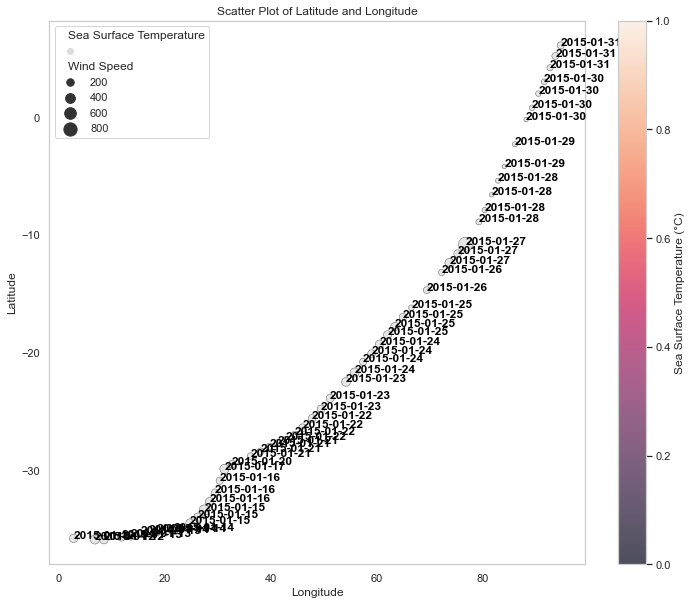

In [7]:
plt.figure(figsize=(12, 10))

# Customize marker size based on wind speed (scaled for visibility)
point_size = selected_data['Wind Speed'] * 2

# Create the scatter plot with enhanced aesthetics
scatter = sns.scatterplot( #creates the scatter plot
    x='Longitude',
    y='Latitude',
    data=selected_data,
    alpha=0.7, #sets the transparency of the data points to 0.7, making them partially transparent
    size=point_size, #defines the size of the data points, which was customized based on wind speed
    sizes=(20, 200), #sets the range of marker sizes. In this case, the smallest marker size is 20, and the largest is 200
    hue='Sea Surface Temperature',  # Color-coding based on temperature
    palette='coolwarm',
    legend='brief',  # Show legend
    edgecolor='k',  # Marker edge color
)

# Assign the scatter plot to a mappable
mappable = scatter.get_children()[0]

# Add tooltips for data points
for line in range(0, selected_data.shape[0]):
    scatter.text(
        selected_data['Longitude'][line] + 0.01,
        selected_data['Latitude'][line],
        selected_data['Time of Observation'][line].strftime("%Y-%m-%d"),
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold',
    )

# Customize the legend and labels
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Turn off the grid
plt.grid(False)

# Show the color bar associated with the mappable
cbar = plt.colorbar(mappable)
cbar.set_label('Sea Surface Temperature (°C)')

plt.show()

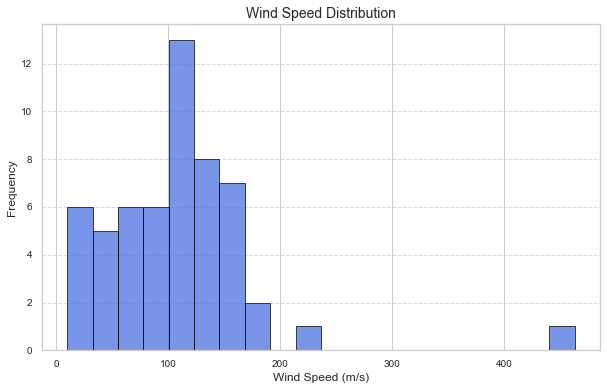

In [8]:
# Create a visually enhanced histogram
plt.figure(figsize=(10, 6)) #10 units in width and 6 units in height

# Define the number of bins and colors
num_bins = 20
bar_color = 'royalblue'
edge_color = 'k'

# Plot the histogram
plt.hist(selected_data['Wind Speed'], bins=num_bins, color=bar_color, edgecolor=edge_color, alpha=0.7)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Wind Speed Distribution', fontsize=14)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

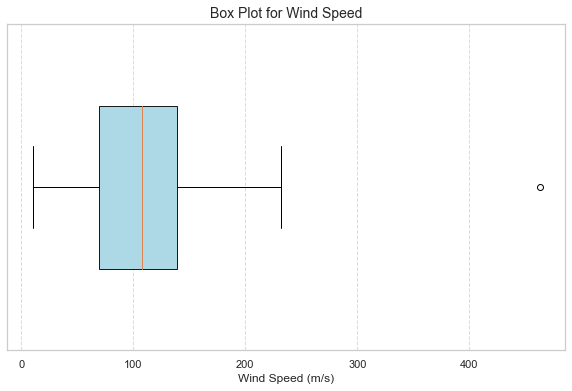

In [9]:
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')  # Set the Seaborn style to 'whitegrid,' providing a white grid background for the plot

# Create the box plot with patch_artist=True
boxprops = dict(facecolor='lightblue', edgecolor='k')
plt.boxplot(selected_data['Wind Speed'], vert=False, widths=0.5, patch_artist=True, boxprops=boxprops)

# Customize the plot appearance
plt.title('Box Plot for Wind Speed', fontsize=14)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.yticks([])  # Remove y-axis ticks for a cleaner appearance
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for the x-axis

# Show the plot
plt.show()

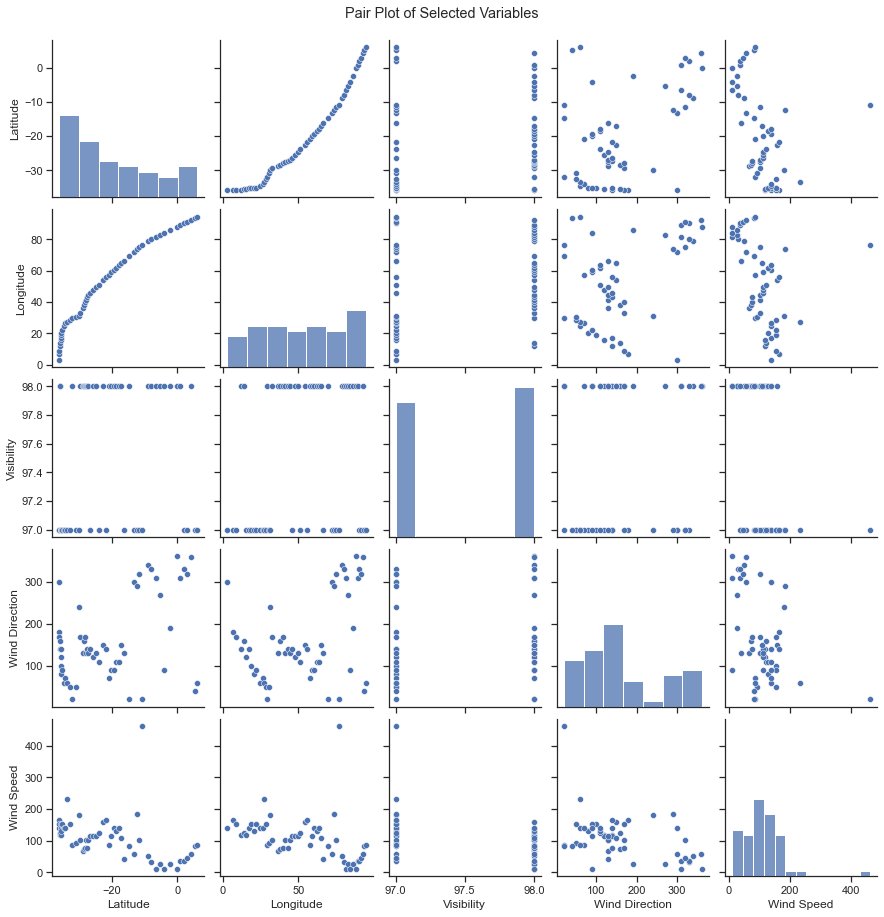

In [10]:
#Pair plot for selected variables
sns.set(style = "ticks")
sns.pairplot(selected_data)
plt.suptitle("Pair Plot of Selected Variables", y = 1.02)
plt.show()

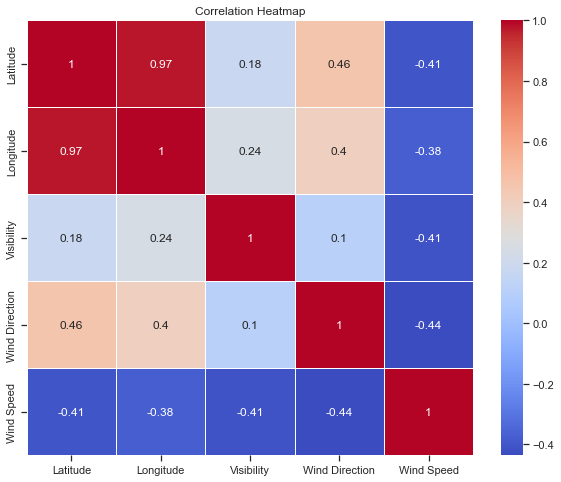

In [11]:
#Correlation Heatmap
plt.figure(figsize=(10, 8)) #10 units in width and 8 units in height
correlation_matrix = selected_data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
#Save the statistics to a CSV file
statistics.to_csv('climate_statistics.csv')

#Save the cleaned data to a new CSV file
selected_data.to_csv('cleaned_climate_data.csv', index = False)